<a href="https://colab.research.google.com/github/Terrykamau/PROJECTS/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import pandas as pd
import os
import numpy as np
zip_path = '/content/file.zip'


extract_path = 'temp_extracted'


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

csv_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
merged_df = pd.concat([pd.read_csv(os.path.join(extract_path, f)) for f in csv_files])


merged_df.to_csv('merged_output.csv', index=False)


import shutil
shutil.rmtree(extract_path)


In [ ]:
import pandas as pd

# Read the merged CSV
df = pd.read_csv('/content/merged_output.csv')

# Display the first few rows
print(df.head())


        DATE  CODE                     NAME 12m Low 12m High Day Low Day High  \
0  02-Jan-20  EGAD              Eaagads Ltd     8.2       14    10.1     10.1   
1  02-Jan-20  KUKZ               Kakuzi Plc     300    423.5     340      340   
2  02-Jan-20  KAPC  Kapchorua Tea Kenya Plc      59       95      80       80   
3  02-Jan-20  LIMT           Limuru Tea Plc     385      475     450      450   
4  02-Jan-20  SASN               Sasini Plc    14.8     19.6   16.15    16.15   

  Day Price Previous Change Change% Volume Adjust SECTOR  
0      10.1     10.1      -       -      -      -    NaN  
1       340      340      -       -      -      -    NaN  
2        80       80      -       -      -      -    NaN  
3       450      450      -       -      -      -    NaN  
4     16.15     16.9  -0.75   4.44%    300      -    NaN  


<ipython-input-5-17131fce7ae8>:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/merged_output.csv')


In [ ]:
print(df.tail)

<bound method NDFrame.tail of              DATE    CODE                     NAME   12m Low  12m High  \
0       02-Jan-20    EGAD              Eaagads Ltd       8.2        14   
1       02-Jan-20    KUKZ               Kakuzi Plc       300     423.5   
2       02-Jan-20    KAPC  Kapchorua Tea Kenya Plc        59        95   
3       02-Jan-20    LIMT           Limuru Tea Plc       385       475   
4       02-Jan-20    SASN               Sasini Plc      14.8      19.6   
...           ...     ...                      ...       ...       ...   
134574  29-Dec-17     GLD         ABSA NewGold ETF  1,235.00  1,835.00   
134575  29-Dec-17  ^FNK15  FTSE NSE Kenya 15 Index    154.41    227.73   
134576  29-Dec-17   ^N20I       NSE 20-Share Index  1,873.47  2,766.77   
134577  29-Dec-17   ^N25I       NSE 25-Share Index  2,943.60  4,207.90   
134578  29-Dec-17   ^NASI      NSE All-Share Index     124.3    171.36   

         Day Low  Day High Day Price  Previous Change Change% Volume Adjust  \
0 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134579 entries, 0 to 134578
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   DATE       134440 non-null  object
 1   CODE       134573 non-null  object
 2   NAME       134573 non-null  object
 3   12m Low    134440 non-null  object
 4   12m High   134440 non-null  object
 5   Day Low    134440 non-null  object
 6   Day High   134440 non-null  object
 7   Day Price  134440 non-null  object
 8   Previous   134440 non-null  object
 9   Change     134440 non-null  object
 10  Change%    134440 non-null  object
 11  Volume     134440 non-null  object
 12  Adjust     134440 non-null  object
 13  SECTOR     133 non-null     object
dtypes: object(14)
memory usage: 14.4+ MB


In [ ]:
df=df[['DATE','Day Price']]
df

,DATE,Day Price
0,02-Jan-20,10.1
1,02-Jan-20,340
2,02-Jan-20,80
3,02-Jan-20,450
4,02-Jan-20,16.15
...,...,...
134574,29-Dec-17,"1,265.00"
134575,29-Dec-17,209.04
134576,29-Dec-17,"3,711.94"
134577,29-Dec-17,"4,283.38"


In [ ]:
from datetime import datetime
import pandas as pd

def str_to_daytime(s):
    if pd.isna(s):  # Skip NaN values
        return None
    return datetime.strptime(str(s), '%d-%b-%y')  # Ensure it's a string




In [ ]:
df


,DATE,Day Price
0,2020-01-02,10.1
1,2020-01-02,340
2,2020-01-02,80
3,2020-01-02,450
4,2020-01-02,16.15
...,...,...
134574,2017-12-29,"1,265.00"
134575,2017-12-29,209.04
134576,2017-12-29,"3,711.94"
134577,2017-12-29,"4,283.38"


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['DATE']

,DATE
0,2020-01-02
1,2020-01-02
2,2020-01-02
3,2020-01-02
4,2020-01-02
...,...
134574,2017-12-29
134575,2017-12-29
134576,2017-12-29
134577,2017-12-29


In [ ]:
df.index=df.pop('DATE')
df

,Day Price
DATE,
2020-01-02,10.1
2020-01-02,340
2020-01-02,80
2020-01-02,450
2020-01-02,16.15
...,...
2017-12-29,"1,265.00"
2017-12-29,209.04
2017-12-29,"3,711.94"


In [ ]:
print(df.columns)


Index(['Day Price'], dtype='object')


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df['Day Price'] = pd.to_numeric(df['Day Price'], errors='coerce')  # will turn invalid values to NaN


In [ ]:
print(df['Day Price'].head())
print(df['Day Price'].dtype)


DATE
2020-01-02     10.10
2020-01-02    340.00
2020-01-02     80.00
2020-01-02    450.00
2020-01-02     16.15
Name: Day Price, dtype: float64
float64


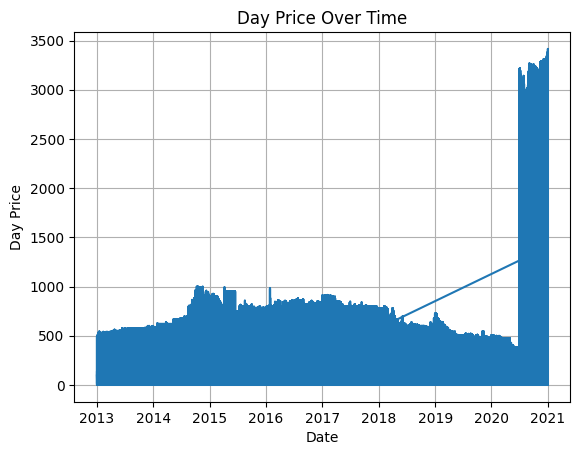

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Day Price'])
plt.xlabel('Date')
plt.ylabel('Day Price')
plt.title('Day Price Over Time')
plt.grid(True)
plt.show()


In [ ]:
def df_to_windowed_df_fast(dataframe, first_date_str, last_date_str, n=3):
    dataframe = dataframe.copy()
    dataframe.index = pd.to_datetime(dataframe.index)
    dataframe = dataframe.sort_index()

    if 'Day Price' not in dataframe.columns:
        raise ValueError("Column 'Day Price' not found")

    # Filter date range once
    first_date = pd.to_datetime(first_date_str)
    last_date = pd.to_datetime(last_date_str)
    df_filtered = dataframe[(dataframe.index >= first_date - pd.Timedelta(days=n*7)) &
                            (dataframe.index <= last_date)]

    dates, X, Y = [], [], []
    idx_list = df_filtered.index

    for i in range(n, len(idx_list)):
        window = df_filtered.iloc[i-n:i+1]
        if len(window) == n + 1:
            x = window['Day Price'].values[:-1]
            y = window['Day Price'].values[-1]
            target_date = window.index[-1]
            if first_date <= target_date <= last_date:
                dates.append(target_date)
                X.append(x)
                Y.append(y)

    # Assemble result
    X = np.array(X)
    ret_df = pd.DataFrame({"Target Date": dates})
    for i in range(n):
        ret_df[f'Target-{n-i}'] = X[:, i]
    ret_df['Target'] = Y

    return ret_df


In [ ]:
windowed_df = df_to_windowed_df_fast(df, '2020-01-02', '2021-03-23', n=3)
print(windowed_df.head())


  Target Date  Target-3  Target-2  Target-1  Target
0  2020-01-02      1.10      0.45     39.80   18.00
1  2020-01-02      0.45     39.80     18.00    2.01
2  2020-01-02     39.80     18.00      2.01     NaN
3  2020-01-02     18.00      2.01       NaN    0.55
4  2020-01-02      2.01       NaN      0.55   29.60


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((17892,), (17892, 3, 1), (17892,))

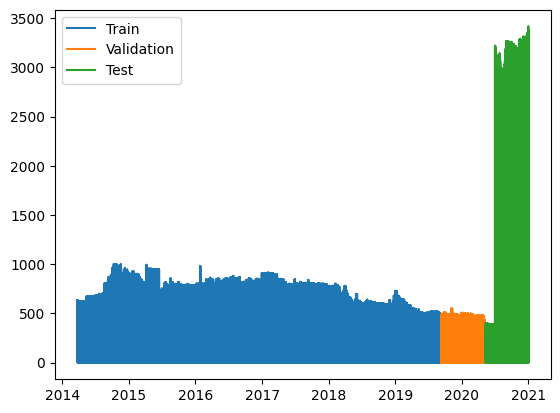

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
print(len(dates_train), len(train_predictions))  # Ensure both lengths match

92764 92764


In [ ]:
# Replace NaN and infinite values with 0 or another appropriate value
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)

In [ ]:
print(np.isnan(X_train).any(), np.isinf(X_train).any())
print(np.isnan(y_train).any(), np.isinf(y_train).any())

False False
False False


In [ ]:
print(train_predictions)  # Check if the predictions contain valid values
print(train_predictions.shape)

[0. 0. 0. ... 0. 0. 0.]
(92764,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 1)).reshape(-1, 3, 1)
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()

In [ ]:
print(X_train[:5])  # Ensure values are scaled
print(y_train[:5])  # Ensure values are meaningful

[[[0.12012012]
  [0.14414415]
  [0.03003003]]

 [[0.14414415]
  [0.03003003]
  [0.2902903 ]]

 [[0.03003003]
  [0.2902903 ]
  [0.00675676]]

 [[0.2902903 ]
  [0.00675676]
  [0.00550551]]

 [[0.00675676]
  [0.00550551]
  [0.01461461]]]
[0.2902903  0.00675676 0.00550551 0.01461461 0.02302302]


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)  # Use a smaller learning rate

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,197 (235.15 KB)

 Trainable params: 20,065 (78.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,132 (156.77 KB)

In [ ]:
print(X_train.shape)  # Should be (num_samples, 3, 1)

(92764, 3, 1)


In [ ]:
model = Sequential([
    layers.Input((3, 1)),
    layers.LSTM(64, return_sequences=True),
    layers.Dropout(0.2),  # Add dropout
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

In [ ]:
train_predictions = model.predict(X_train).flatten()
for date, prediction in zip(dates_train, train_predictions):
    print(f"{date}: {prediction}")

Streaming output truncated to the last 5000 lines.
2019-06-06 00:00:00: -6.186899554450065e-05
2019-06-06 00:00:00: -6.455497350543737e-05
2019-06-06 00:00:00: -0.0001189812901429832
2019-06-06 00:00:00: -0.0001937905908562243
2019-06-06 00:00:00: -0.00019049886032007635
2019-06-06 00:00:00: -0.00017431331798434258
2019-06-06 00:00:00: -0.0003092019469477236
2019-06-06 00:00:00: -0.0003378302208147943
2019-06-06 00:00:00: -0.00027476390823721886
2019-06-06 00:00:00: -9.869511995930225e-05
2019-06-06 00:00:00: -0.00011082296259701252
2019-06-06 00:00:00: -0.0003165905945934355
2019-06-06 00:00:00: -0.000351131078787148
2019-06-06 00:00:00: -0.0009885922772809863
2019-06-06 00:00:00: -0.0010307289194315672
2019-06-06 00:00:00: -0.000870867632329464
2019-06-06 00:00:00: -0.00018243640079163015
2019-06-06 00:00:00: -0.0002678036689758301
2019-06-06 00:00:00: -0.0007896706229075789
2019-06-06 00:00:00: -0.0007922712247818708
2019-06-06 00:00:00: -0.0005370473954826593
2019-06-06 00:00:00: -

In [ ]:
print(X_train.shape)  # Ensure it's compatible with the model
print(y_train.shape)  # Check the shape of target data
print(train_predictions.shape)  # Predictions shape should match y_train

(92764, 3, 1)
(92764,)
(92764,)


In [ ]:
print(len(dates_train), len(train_predictions))

92764 92764


In [ ]:
print(np.isnan(train_predictions).any(), np.isinf(train_predictions).any())  # Check for NaN or Inf
train_predictions = np.nan_to_num(train_predictions)  # Replace NaN or Inf with valid numbers

False False


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import numpy as np

# Ensure data is preprocessed (scaled, cleaned, reshaped appropriately)

model = Sequential([
    layers.Input((3, 1)),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.001, clipnorm=1.0),
    metrics=['mean_absolute_error']
)

# Fit the model
model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10
)

Epoch 1/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - loss: 0.0187 - mean_absolute_error: 0.0858 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0176 - mean_absolute_error: 0.0836 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0170 - mean_absolute_error: 0.0818 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0166 - mean_absolute_error: 0.0806 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0164 - mean_absolute_error: 0.0796 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0161 - mean_absolute_error: 0.0789 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7/10
2899/2899 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0160 - mean_absolute_error: 0.0781 - val_loss: nan - 

In [ ]:
print(train_predictions)  # Check the values in train_predictions
print(np.isnan(train_predictions).any())  # True if it contains NaN
print(np.isinf(train_predictions).any())  # True if it contains infinite values

[-5.4613291e-04 -7.8791357e-04 -6.5407902e-04 ... -1.7835791e-05
 -2.6954713e-05 -2.0185467e-05]
False
False


In [ ]:
train_predictions = np.nan_to_num(train_predictions)  # Replace NaN/Inf with valid numbers

In [ ]:
print(len(dates_train), len(train_predictions))

92764 92764


In [ ]:
train_predictions = (train_predictions - min(train_predictions)) / (max(train_predictions) - min(train_predictions))

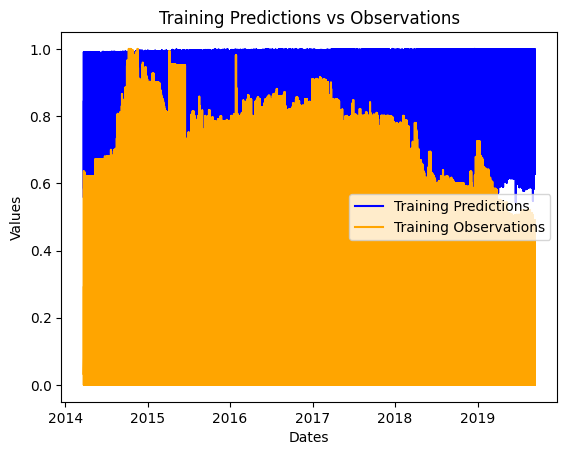

In [ ]:
import matplotlib.pyplot as plt

# Plot training predictions and observations
plt.plot(dates_train, train_predictions, label='Training Predictions', linestyle='-', color='blue')
plt.plot(dates_train, y_train, label='Training Observations', linestyle='-', color='orange')

# Add labels, legend, and title
plt.legend()
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Training Predictions vs Observations')

# Show the plot
plt.show()

In [ ]:
for date, prediction in zip(dates_train, train_predictions):
    print(f"{date}: {prediction}")

Streaming output truncated to the last 5000 lines.
2019-06-06 00:00:00: 0.9821928143501282
2019-06-06 00:00:00: 0.9814196825027466
2019-06-06 00:00:00: 0.9657546877861023
2019-06-06 00:00:00: 0.9442229866981506
2019-06-06 00:00:00: 0.9451704621315002
2019-06-06 00:00:00: 0.9498289823532104
2019-06-06 00:00:00: 0.9110051989555359
2019-06-06 00:00:00: 0.9027653336524963
2019-06-06 00:00:00: 0.9209171533584595
2019-06-06 00:00:00: 0.9715934991836548
2019-06-06 00:00:00: 0.9681028127670288
2019-06-06 00:00:00: 0.9088785648345947
2019-06-06 00:00:00: 0.8989371061325073
2019-06-06 00:00:00: 0.7154622673988342
2019-06-06 00:00:00: 0.7033345103263855
2019-06-06 00:00:00: 0.7493459582328796
2019-06-06 00:00:00: 0.9474909901618958
2019-06-06 00:00:00: 0.9229204654693604
2019-06-06 00:00:00: 0.7727161049842834
2019-06-06 00:00:00: 0.7719676494598389
2019-06-06 00:00:00: 0.8454264402389526
2019-06-06 00:00:00: 0.988135039806366
2019-06-06 00:00:00: 0.9481523036956787
2019-06-06 00:00:00: 0.8871793

In [ ]:
print(len(dates_val), len(y_val))  # Confirm lengths are identical

11595 11595


In [ ]:
print(y_val)  # Check values
print(np.isnan(y_val).any(), np.isinf(y_val).any())  # Verify no NaN or infinite values

[  3.55   2.2     nan ...   1.9  115.    16.5 ]
True False


In [ ]:
y_val = np.nan_to_num(y_val)

In [ ]:
print(y_val)  # Check values
print(np.isnan(y_val).any(), np.isinf(y_val).any())

[  3.55   2.2    0.   ...   1.9  115.    16.5 ]
False False


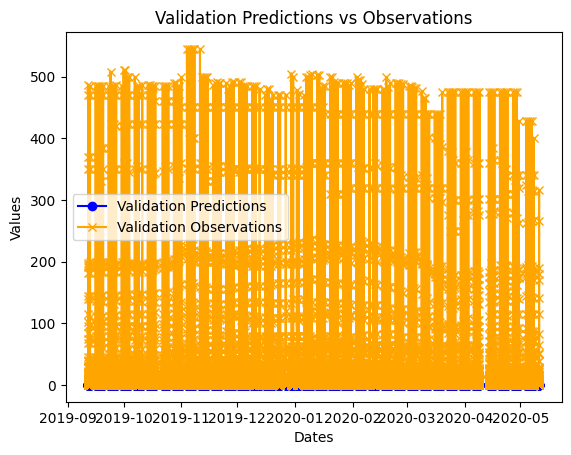

In [ ]:
import matplotlib.pyplot as plt

plt.plot(dates_val, val_predictions, label='Validation Predictions', linestyle='-', color='blue', marker='o')
plt.plot(dates_val, y_val, label='Validation Observations', linestyle='-', color='orange', marker='x')
plt.legend()
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Validation Predictions vs Observations')
plt.show()

In [ ]:
y_val = (y_val - np.min(y_val)) / (np.max(y_val) - np.min(y_val))
val_predictions = (val_predictions - np.min(val_predictions)) / (np.max(val_predictions) - np.min(val_predictions))

In [ ]:
for date, prediction, observation in zip(dates_val, val_predictions, y_val):
    print(f"{date}: Prediction={prediction}, Observation={observation}")

2019-09-12 00:00:00: Prediction=nan, Observation=0.006513761356472969
2019-09-12 00:00:00: Prediction=nan, Observation=0.004036697559058666
2019-09-12 00:00:00: Prediction=nan, Observation=0.0
2019-09-12 00:00:00: Prediction=nan, Observation=0.0009174311999231577
2019-09-12 00:00:00: Prediction=nan, Observation=0.05376146733760834
2019-09-12 00:00:00: Prediction=nan, Observation=0.03477064520120621
2019-09-12 00:00:00: Prediction=nan, Observation=0.0066788992844522
2019-09-12 00:00:00: Prediction=nan, Observation=0.005486238747835159
2019-09-12 00:00:00: Prediction=nan, Observation=0.6788991093635559
2019-09-12 00:00:00: Prediction=nan, Observation=0.0058532110415399075
2019-09-12 00:00:00: Prediction=nan, Observation=0.012954127974808216
2019-09-12 00:00:00: Prediction=nan, Observation=0.012256880290806293
2019-09-12 00:00:00: Prediction=nan, Observation=0.052935779094696045
2019-09-12 00:00:00: Prediction=nan, Observation=0.019266055896878242
2019-09-12 00:00:00: Prediction=nan, Obse

In [ ]:
for date, prediction, observation in zip(dates_val, val_predictions, y_val):
    print(f"{date}: Prediction={prediction}, Observation={observation}")

2019-09-12 00:00:00: Prediction=nan, Observation=0.006513761356472969
2019-09-12 00:00:00: Prediction=nan, Observation=0.004036697559058666
2019-09-12 00:00:00: Prediction=nan, Observation=0.0
2019-09-12 00:00:00: Prediction=nan, Observation=0.0009174311999231577
2019-09-12 00:00:00: Prediction=nan, Observation=0.05376146733760834
2019-09-12 00:00:00: Prediction=nan, Observation=0.03477064520120621
2019-09-12 00:00:00: Prediction=nan, Observation=0.0066788992844522
2019-09-12 00:00:00: Prediction=nan, Observation=0.005486238747835159
2019-09-12 00:00:00: Prediction=nan, Observation=0.6788991093635559
2019-09-12 00:00:00: Prediction=nan, Observation=0.0058532110415399075
2019-09-12 00:00:00: Prediction=nan, Observation=0.012954127974808216
2019-09-12 00:00:00: Prediction=nan, Observation=0.012256880290806293
2019-09-12 00:00:00: Prediction=nan, Observation=0.052935779094696045
2019-09-12 00:00:00: Prediction=nan, Observation=0.019266055896878242
2019-09-12 00:00:00: Prediction=nan, Obse

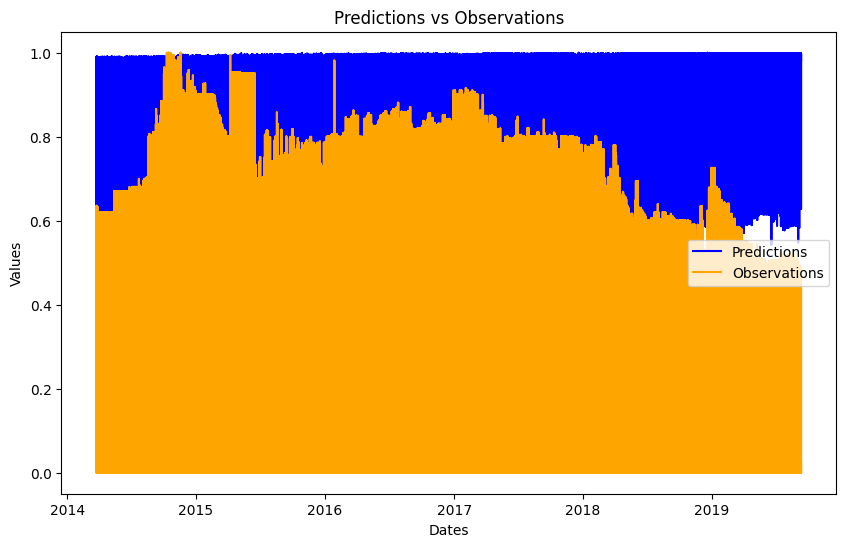

In [ ]:
import matplotlib.pyplot as plt

# Example data: Replace these with your actual arrays
# dates_train: List of dates
# train_predictions: Array of predictions
# y_train: Array of observations

plt.figure(figsize=(10, 6))  # Set figure size

# Plot predictions
plt.plot(dates_train, train_predictions, label='Predictions', linestyle='-', color='blue')

# Plot observations
plt.plot(dates_train, y_train, label='Observations', linestyle='-', color='orange')

# Add labels, legend, and title
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Predictions vs Observations')
plt.legend()

# Show the plot
plt.show()

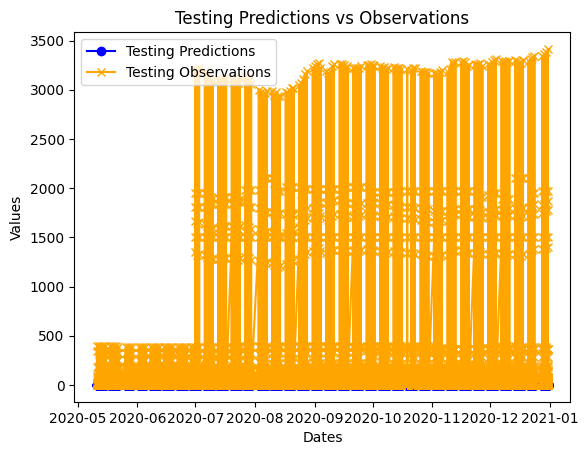

In [ ]:
import matplotlib.pyplot as plt

# Check data lengths and clean invalid values
assert len(dates_test) == len(test_predictions) == len(y_test), "Data lengths do not match!"

# Plot testing predictions
plt.plot(dates_test, test_predictions, label='Testing Predictions', linestyle='-', color='blue', marker='o')

# Plot testing observations
plt.plot(dates_test, y_test, label='Testing Observations', linestyle='-', color='orange', marker='x')

# Add labels, legend, and title
plt.legend()
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Testing Predictions vs Observations')

# Display the plot
plt.show()

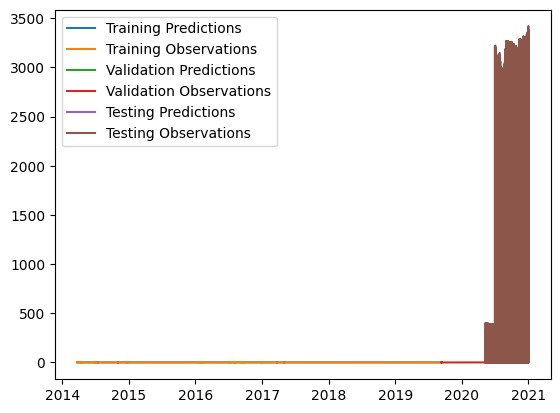

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

ValueError: x and y must have same first dimension, but have shapes (23191,) and (424, 1)

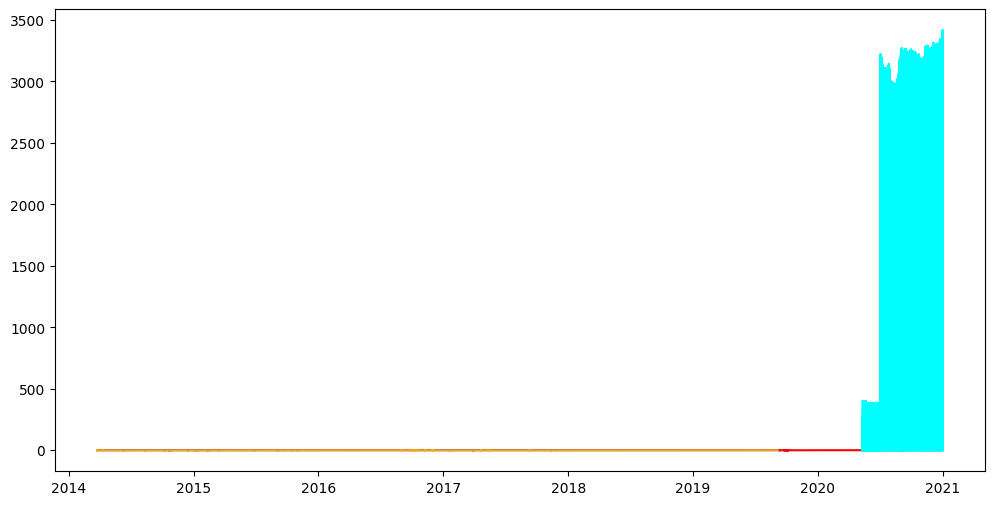

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set figure size for better visualization

# Plot training predictions and observations
plt.plot(dates_train, train_predictions, label='Training Predictions', linestyle='-', color='blue')
plt.plot(dates_train, y_train, label='Training Observations', linestyle='-', color='orange')

# Plot validation predictions and observations
plt.plot(dates_val, val_predictions, label='Validation Predictions', linestyle='-', color='green')
plt.plot(dates_val, y_val, label='Validation Observations', linestyle='-', color='red')

# Plot testing predictions and observations
plt.plot(dates_test, test_predictions, label='Testing Predictions', linestyle='-', color='purple')
plt.plot(dates_test, y_test, label='Testing Observations', linestyle='-', color='cyan')

# Plot recursive predictions
plt.plot(recursive_dates, recursive_predictions, label='Recursive Predictions', linestyle='--', color='black')

# Add labels, legend, and title
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Predictions and Observations')
plt.legend()

# Display the plot
plt.show()